<a href="https://colab.research.google.com/github/anoojtk/python-correlation/blob/main/houesprice_corr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/data science/homeprices (1).csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [ ]:
df.shape

(5, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 208.0 bytes


In [ ]:
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


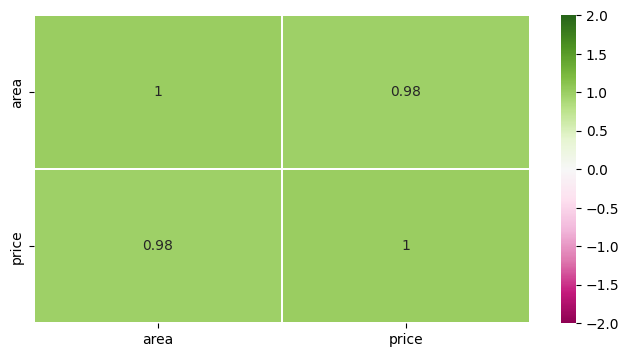

In [ ]:
core=df.corr()
plt.subplots(figsize=(8,4))
sns.heatmap(core,vmin=-2,vmax=2,annot=True,linewidths=0.2,cmap='PiYG')
plt.show()

In [ ]:
y=df['price']
x=df.drop(['price'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [ ]:
x_test

,area
1,3000
4,4000


In [ ]:
y_test

1    565000
4    725000
Name: price, dtype: int64

In [ ]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
pickle.dump(lr,open('model.pkl','wb'))

In [ ]:
pre=model.predict(x_test)
pre

array([596315.78947368, 723947.36842105])

In [ ]:
print(y_test)

1    565000
4    725000
Name: price, dtype: int64


In [ ]:
print(pre)

[596315.78947368 723947.36842105]


In [ ]:
from sklearn.metrics import mean_squared_error
print('MSC is:',mean_squared_error(y_test,pre))

MSC is: 490893351.800556


In [ ]:
x=int(input('enter your Area'))
d=pd.Series(x)
d1=pd.DataFrame(d)
pre=model.predict(d1)
print('your home price predictoin is:',pre)

enter your Area220
your home price predictoin is: [241500.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
